In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set_style("whitegrid")
%matplotlib inline

In [40]:
train_df = pd.read_csv('../Modified Datasets/data_missing_clean.csv')
train_df.head()

,Unnamed: 0.1,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,...,228.0,218.571429,0,0,0,0,0,0,0,1
1,1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,...,51.0,51.000000,0,0,0,0,0,0,0,1
2,2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,...,228.0,218.571429,0,0,0,0,0,0,0,0
3,3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,...,337.0,337.000000,0,0,0,0,0,0,0,0
4,4,5,201746,33,19.0,27.562370,0,Caucasian,M,188.0,...,228.0,218.571429,0,0,0,0,0,0,0,0


In [41]:
train_df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis="columns", inplace=True)
train_df.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,...,228.0,218.571429,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,...,51.0,51.000000,0,0,0,0,0,0,0,1
2,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,...,228.0,218.571429,0,0,0,0,0,0,0,0
3,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,337.0,337.000000,0,0,0,0,0,0,0,0
4,201746,33,19.0,27.562370,0,Caucasian,M,188.0,Emergency Department,Accident & Emergency,...,228.0,218.571429,0,0,0,0,0,0,0,0


In [42]:
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128543 entries, 0 to 128542
Data columns (total 180 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    encounter_id                 int64  
 1    hospital_id                  int64  
 2    age                          float64
 3    bmi                          float64
 4    elective_surgery             int64  
 5    ethnicity                    object 
 6    gender                       object 
 7    height                       float64
 8    hospital_admit_source        object 
 9    icu_admit_source             object 
 10   icu_id                       int64  
 11   icu_stay_type                object 
 12   icu_type                     object 
 13   pre_icu_los_days             float64
 14   readmission_status           int64  
 15   weight                       float64
 16   albumin_apache               float64
 17   apache_2_diagnosis           float64
 18   apache_3j_diagnosis   

<AxesSubplot:>

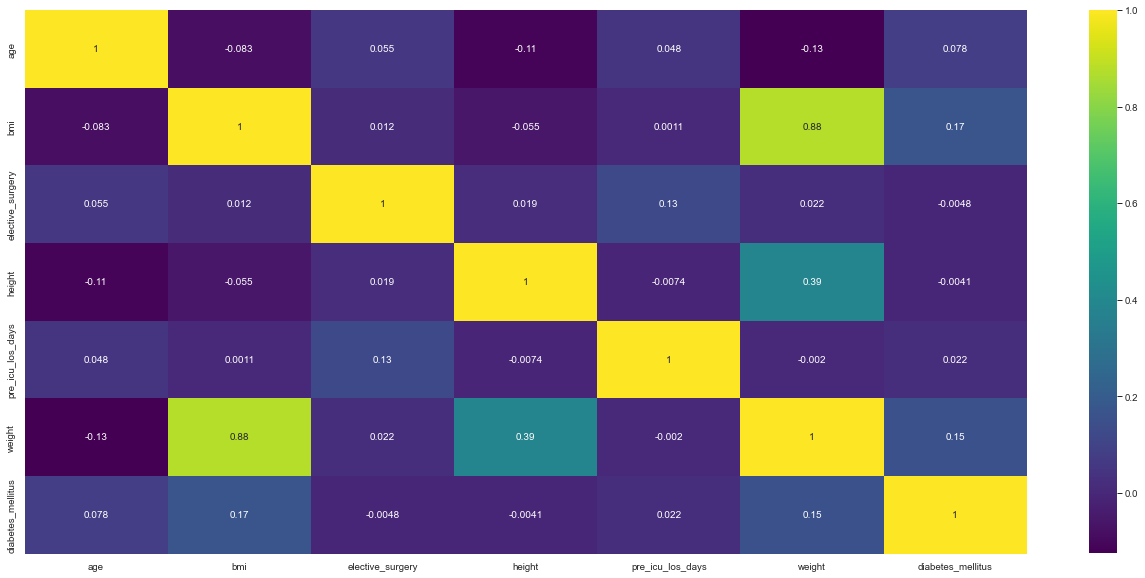

In [43]:
dm = train_df[['age','bmi','elective_surgery','ethnicity','gender',
    'height','icu_admit_source','icu_stay_type','icu_type',
    'pre_icu_los_days','weight','diabetes_mellitus']]

plt.figure(figsize=(20,10))
sns.heatmap(dm.corr(),annot=True,cmap="viridis")

> The above plot shows that bmi and weight are highly correlated. This is because the formula for bmi is:

> $\mathbf{bmi} = \frac {\mathbf{height}(in Kilograms)} {\mathbf{weight^2}}$


> The feature weight is also positively correlated with the target variable. As there is a higher occurrences of diabetes among obese people.

Diabetes Percentage among males: 21.95826091952372
Diabets Percentage among females: 21.449422946367957


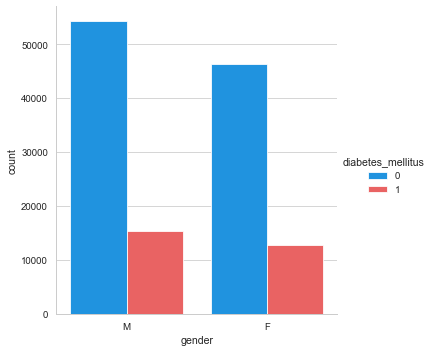

In [44]:
from  matplotlib.ticker import PercentFormatter
sns.catplot(x="gender", hue="diabetes_mellitus", data=train_df, kind="count")

male_diabetes_percentage = train_df[(train_df["gender"] == "M") & (train_df["diabetes_mellitus"] == 1)].shape[0] / train_df[train_df["gender"] == "M"].shape[0]
female_diabetes_percentage = train_df[(train_df["gender"] == "F") & (train_df["diabetes_mellitus"] == 1)].shape[0] / train_df[train_df["gender"] == "F"].shape[0]

print("Diabetes Percentage among males:", male_diabetes_percentage*100)
print("Diabets Percentage among females:", female_diabetes_percentage*100)

This shows Men have slightly more chances of having diabetes than women. Reports show that Men are more likely to get **Type 2 Diabetes** at a lower weight than women. One reason is that men store more fat in their bellies—a known risk factor. Here is a reference: [cdc.gov](https://www.cdc.gov/diabetes/library/features/diabetes-and-men.html)

In [45]:
train_df["bmi"].min()

14.84492591

Obesity among Male: 69.64796116225959 %
Obesity among Female: 66.50373387644264 %


<AxesSubplot:>

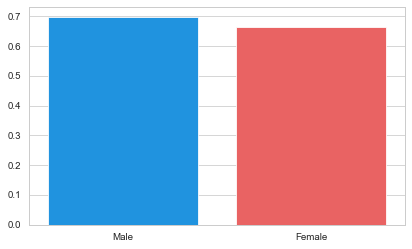

In [46]:
obese_male_percentage = train_df[(train_df["gender"] == "M") & (train_df["bmi"] > 24.9)].shape[0] / train_df[train_df["gender"] == "M"].shape[0]
obese_female_percentage = train_df[(train_df["gender"] == "F") & (train_df["bmi"] > 24.9)].shape[0] / train_df[train_df["gender"] == "F"].shape[0]
print("Obesity among Male:", obese_male_percentage*100, "%")
print("Obesity among Female:", obese_female_percentage*100, "%")

sns.barplot(x=["Male", "Female"], y=[obese_male_percentage, obese_female_percentage])

There is a higher obesity percentage among male than female that further supports the above diabetes distrbution among male and female

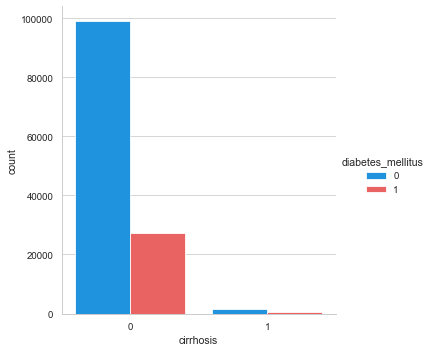

In [47]:
sns.catplot(x="cirrhosis", hue="diabetes_mellitus", data=train_df, kind="count")

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 216x288 with 0 Axes>

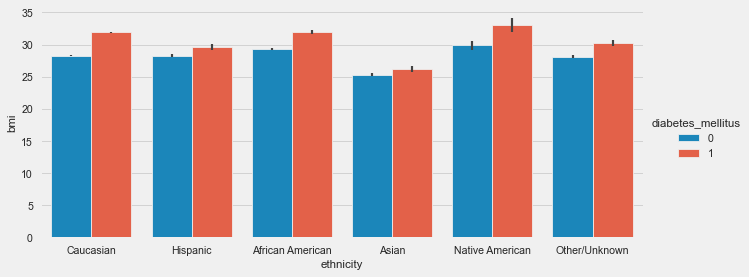

In [48]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(3,4))
sns.set_context("paper", font_scale=1.2)   
sns.factorplot(x="ethnicity", y="bmi", hue="diabetes_mellitus", data=train_df, kind="bar",height = 4, aspect = 2.3)

In [49]:
ethnicities = train_df.ethnicity.unique()
for ethnicity in ethnicities:
    db_percentage = train_df[(train_df.ethnicity==ethnicity) & (train_df.diabetes_mellitus==1)].shape[0] / train_df[train_df.ethnicity==ethnicity].shape[0]
    print("Diabetes percentage among,", ethnicity, "is:", db_percentage*100, "%")

Diabetes percentage among, Caucasian is: 20.556337114749518 %
Diabetes percentage among, Hispanic is: 24.623613312202853 %
Diabetes percentage among, African American is: 26.2764274413922 %
Diabetes percentage among, Asian is: 24.476797088262057 %
Diabetes percentage among, Native American is: 32.131147540983605 %
Diabetes percentage among, Other/Unknown is: 25.508081293006878 %


Considering ethnicity the diabetes is higher among Native Americans. For more deep dive into [this](https://www.ncbi.nlm.nih.gov/books/NBK233089/)

<Figure size 1440x1440 with 0 Axes>

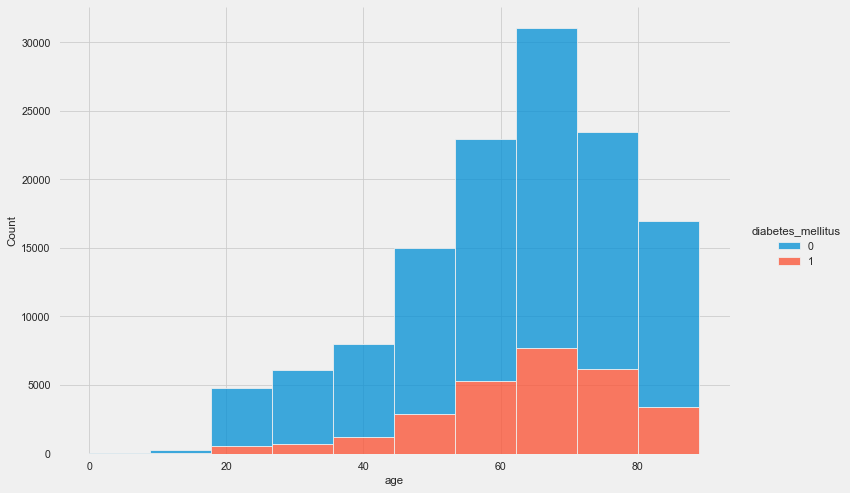

In [50]:
plt.figure(figsize=(20, 20))
sns.displot(train_df, kind="hist", x="age", hue="diabetes_mellitus", bins=10, multiple="stack", aspect=1.5, height=7)
plt.show();

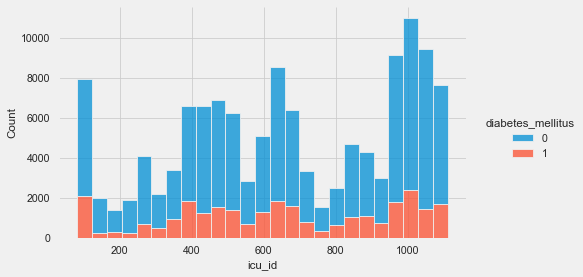

In [51]:
sns.displot(data = train_df, kind = 'hist', x = 'icu_id', hue = 'diabetes_mellitus', multiple = 'stack',bins=25,height = 4, aspect = 1.7)

Some of the icu's have more diabetes patient than the other ones. Let's investigate that

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


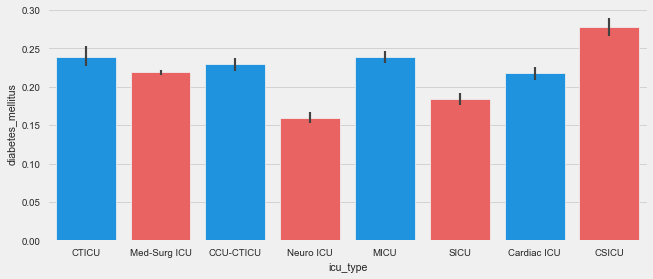

In [52]:
plt.style.use('fivethirtyeight')
sns.set_context("paper", font_scale=1.1)   
gcbest = ["#0099ff", "#ff4d4d"]
sns.set_palette(gcbest,20)
sns.factorplot(x="icu_type", y="diabetes_mellitus", data=train_df, kind="bar",height = 4, aspect = 2.3)

**CSICU** (Cardiac Surgery ICU), **CTICU** (Cardio-Thoracic) and **MICU** (General medical ICU) have the highest precentage of patients with diabetes. **Neuro** ICU have the lowest. This maybe a reason that the diabetes lead to a lot more cardiac diseases. A diabetes patient can have a higher risk of heart disease, stroke, and other cardiovascular diseases. More info on this can be found [here](https://www.cdc.gov/diabetes/library/features/diabetes-and-heart.html#:~:text=If%20you%20have%20diabetes%2C%20you,are%20to%20have%20heart%20disease.)

<AxesSubplot:>

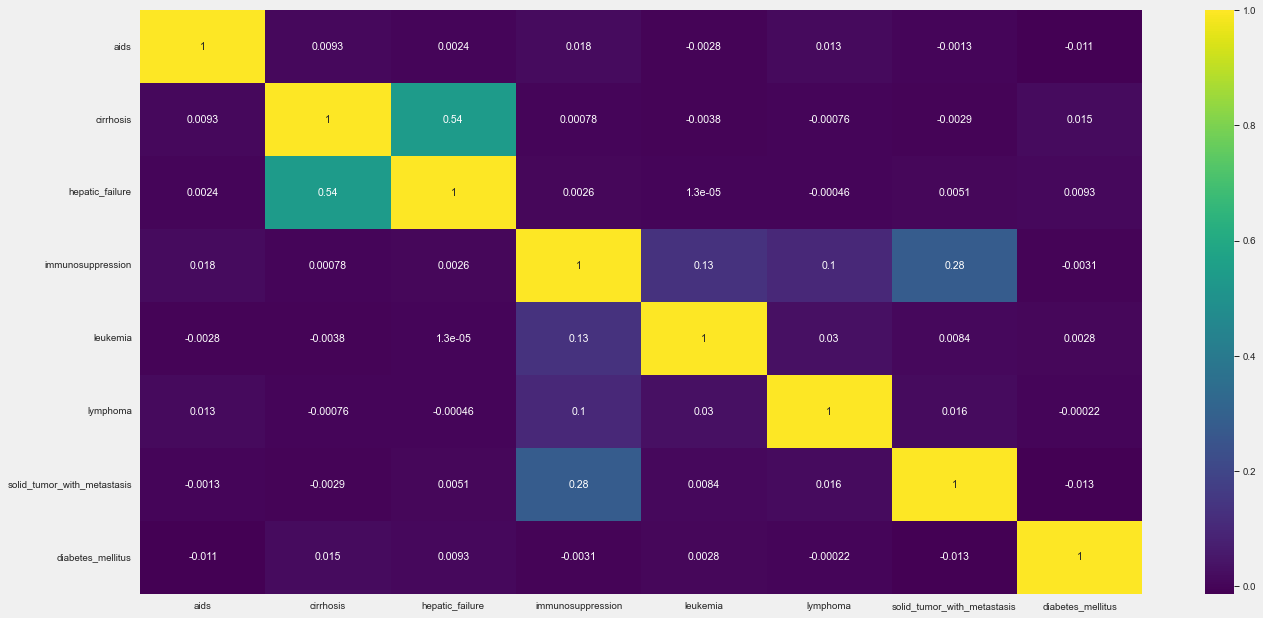

In [53]:
comorbodity = train_df.iloc[:, 172:179]
comorbodity["diabetes_mellitus"] = train_df.diabetes_mellitus

plt.figure(figsize=(20,10))
sns.heatmap(comorbodity.corr(),annot=True,cmap="viridis")

Cirrhosis is a chronic disease of the liver marked by degeneration of cells, inflammation, and fibrous thickening of tissue. It is typically a result of alcoholism or hepatitis. It can lead to liver failure. That's why we can see a strong correlation between hepatic failure and cirrhosis as cirrhosis can lead to hepatic failure

Also, metasis solid tumors and immunosuppression are positively correlated. As the more the immune system is suppressed, the more the cancer is likely to spread. Lymphoma a broad term for cancer. That is why it is also positively correlated with immunosuppresson.

<AxesSubplot:>

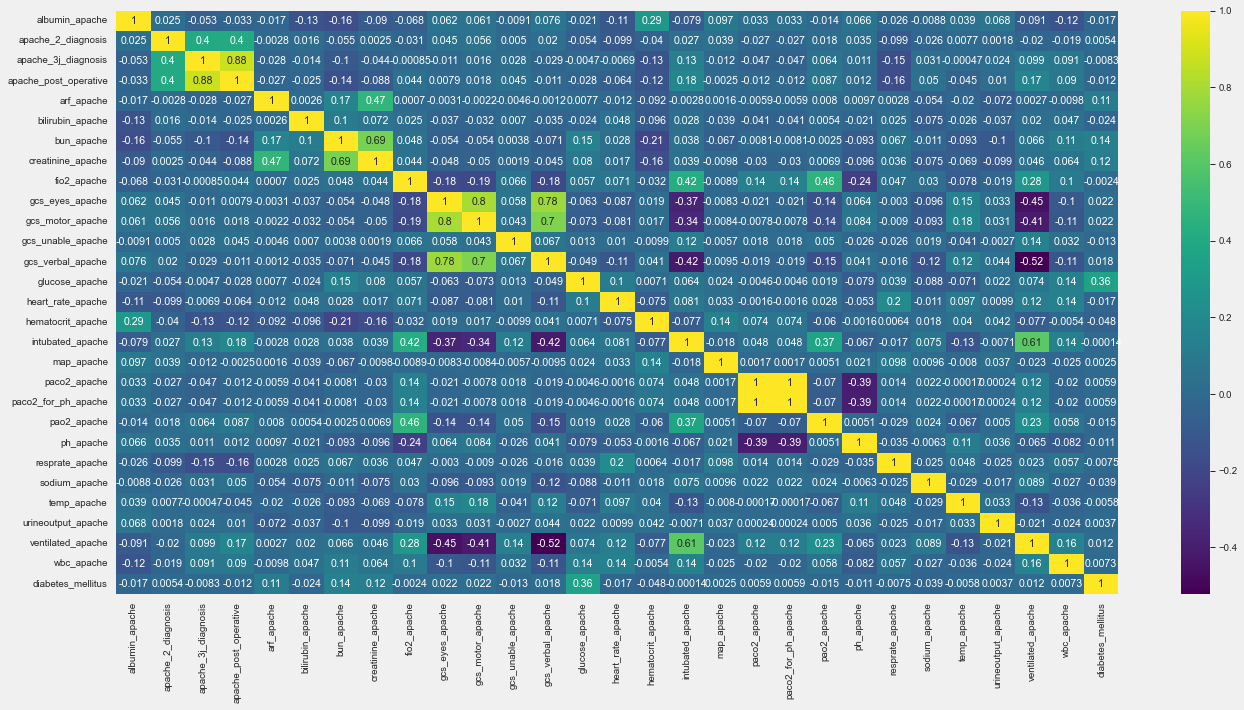

In [54]:
apache_covariates = train_df.iloc[:, 16:44]
apache_covariates["diabetes_mellitus"] = train_df.diabetes_mellitus

plt.figure(figsize=(20,10))
sns.heatmap(apache_covariates.corr(),annot=True,cmap="viridis")

Acute Physiology and Chronic Health Evaluation (APACHE) scoring is performed in the first 24 hours of admission of a patient to an intensive care unit for measuring disease severity based on current physiologic variables, age & previous health conditions.

Diabetes mellitus is associated with lower mortality in ICU, which can be measured using the APACHE scoring systems. [Source](https://assets.researchsquare.com/files/rs-108275/v1/07a73383-8312-4f4b-bc0b-46b3626d138f.pdf?c=1631861145)

Glucose concentration, Blood urine nitrogen, Renal failure, and Creatinine concentration variables are found to be the most impactful APACHE variables for detecting Diabetes mellitus. 

Since diabetes is caused by high blood sugar levels than usual, this variable is found to be most related to our target variable. High blood sugar from diabetes can damage blood vessels in the kidneys, causing problems in renal functionalities.

This is why the target label is positively correlated with `glucose_apache`, `creatinine_apache`, `bun_apache`, `arf_apache`

<AxesSubplot:>

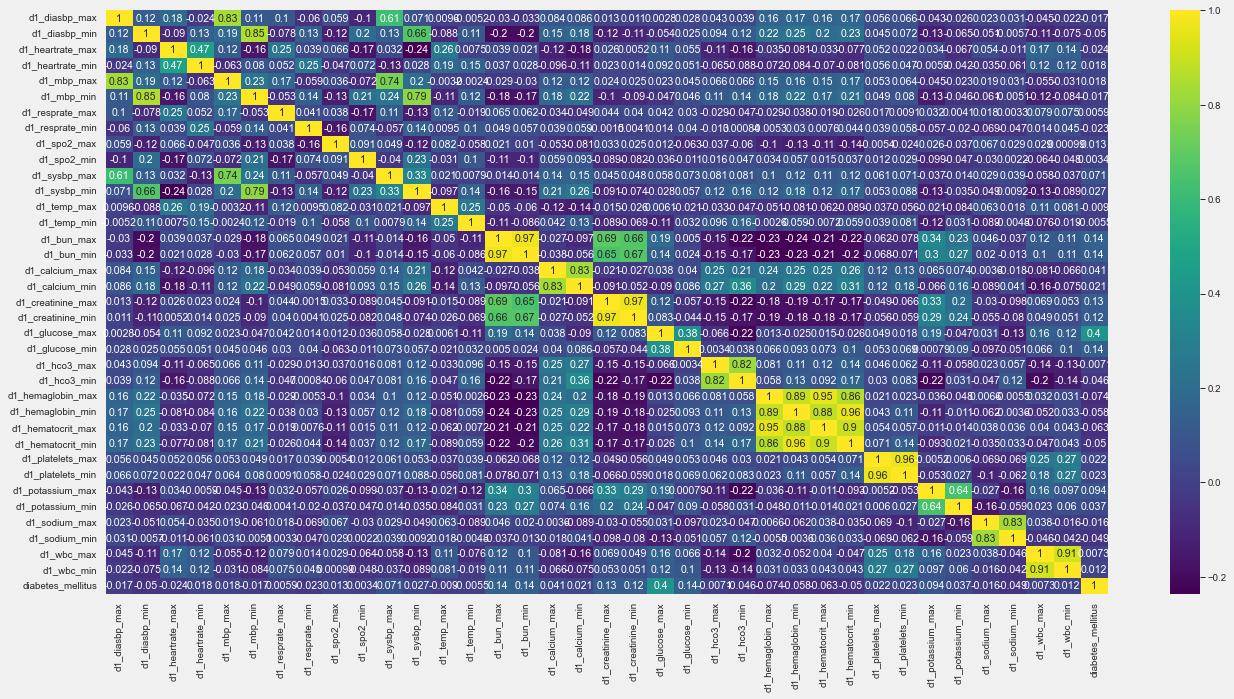

In [55]:
vitals = train_df[['d1_diasbp_max', 'd1_diasbp_min', 'd1_heartrate_max','d1_heartrate_min', 
                'd1_mbp_max', 'd1_mbp_min', 'd1_resprate_max','d1_resprate_min', 'd1_spo2_max', 
                'd1_spo2_min', 'd1_sysbp_max','d1_sysbp_min', 'd1_temp_max', 'd1_temp_min', 'd1_bun_max',
                'd1_bun_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max','d1_creatinine_min', 
                'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max','d1_hco3_min', 'd1_hemaglobin_max', 
                'd1_hemaglobin_min','d1_hematocrit_max', 'd1_hematocrit_min', 'd1_platelets_max', 
                'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min','d1_sodium_max', 'd1_sodium_min', 
                'd1_wbc_max', 'd1_wbc_min','diabetes_mellitus']]
plt.figure(figsize=(20,10))
sns.heatmap(vitals.corr(),annot=True,cmap="viridis")

This plot also shows the same correlation between the target variable and the features because of the reasons described above.